In [51]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [52]:
import pandas as pd
import numpy as np # linear algebra
import matplotlib.pyplot as plt #to plot charts
import seaborn as sns #used for data visualization
import warnings #avoid warning flash

df=pd.read_csv("../input/pima-indians-diabetes-database/diabetes.csv")


In [53]:

#Filling Missing Values

df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())#normal distribution
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())#normal distribution
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())#skewed distribution
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())#skewed distribution
df['BMI']=df['BMI'].replace(0,df['BMI'].median())#skewed distribution

<Axes: >

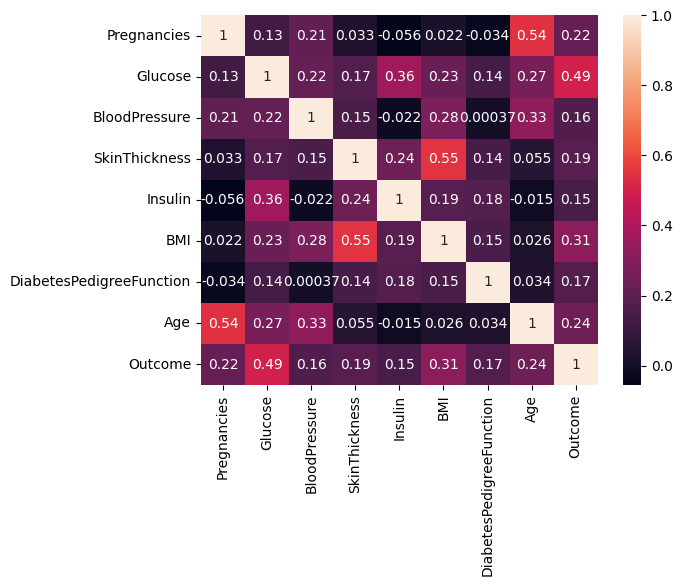

In [54]:
corrmat=df.corr()
sns.heatmap(corrmat, annot=True)

With Respect to Outcome  Blood pressure, Skin Thickness and DiabetesPedigreeFunction are least useful

In [55]:
df_selected=df.drop(['BloodPressure','Insulin','DiabetesPedigreeFunction'],axis='columns')

In [56]:
from sklearn.preprocessing import QuantileTransformer
x=df_selected
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
df_new=quantile.transform(X)
df_new=pd.DataFrame(X)
df_new.columns =['Pregnancies', 'Glucose','SkinThickness','BMI','Age','Outcome']
df_new.head()


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (768). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


,Pregnancies,Glucose,SkinThickness,BMI,Age,Outcome
0,0.747718,0.810300,0.801825,0.591265,0.889831,1.0
1,0.232725,0.091265,0.644720,0.213168,0.558670,0.0
2,0.863755,0.956975,0.357888,0.077575,0.585398,1.0
3,0.232725,0.124511,0.357888,0.284224,0.000000,0.0
4,0.000000,0.721643,0.801825,0.926988,0.606258,1.0


In [57]:
target_name='Outcome'
y= df_new[target_name]#given predictions - training data 
X=df_new.drop(target_name,axis=1)#dropping the Outcome column and keeping all other columns as X

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.20,random_state=0)#splitting data in 80% train, 20%test

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score


In [70]:
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(), X, y, cv=5)


array([0.75324675, 0.70779221, 0.77922078, 0.79738562, 0.78431373])

In [74]:
reg = LogisticRegression(penalty='l1', solver='liblinear')
reg.fit(X_train,y_train)                         

LogisticRegression(penalty='l1', solver='liblinear')

In [75]:
lr_pred=reg.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.82      0.88      0.85       110
         1.0       0.70      0.58      0.63        52

    accuracy                           0.78       162
   macro avg       0.76      0.73      0.74       162
weighted avg       0.78      0.78      0.78       162


 F1:
 0.631578947368421

 Precision score is:
 0.6976744186046512

 Recall score is:
 0.5769230769230769

 Confusion Matrix:



<Axes: >

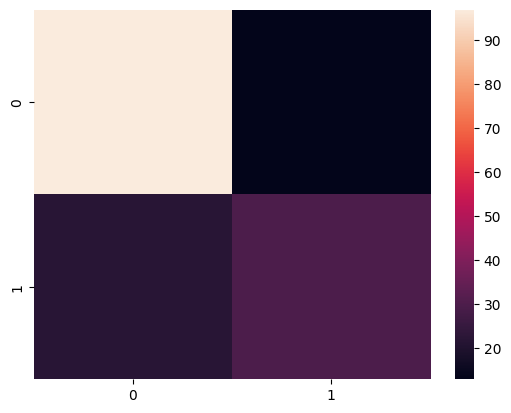

In [76]:
print("Classification Report is:\n",classification_report(y_test,lr_pred))
print("\n F1:\n",f1_score(y_test,lr_pred))
print("\n Precision score is:\n",precision_score(y_test,lr_pred))
print("\n Recall score is:\n",recall_score(y_test,lr_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,lr_pred))